In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

In [2]:
aire =pd.read_csv(r'AirQuality.csv', sep=';', decimal=',')

In [3]:
aire.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

## Explicación de las variables:

1.	Date:Fecha de la medición, en formato día/mes/año.
2.	Time: Promedio de la hora de la medición, en formato hora.minuto.segundo.
3.	CO(GT): Concentración horaria “verdadera” de monóxido de carbono (CO) medida por un analizador de referencia. Unidad: mg/m³.
4.	PT08.S1(CO): Señal promedio horaria del sensor S1 (basado en óxido de estaño), diseñado principalmente para detectar CO. Es una lectura del sensor en unidades instrumentales.
5.	NMHC(GT): Concentración horaria “verdadera” de hidrocarburos no metánicos (NMHC) medida por analizador de referencia. Unidad: µg/m³.
6.	C6H6(GT): Concentración horaria “verdadera” de benceno (C₆H₆), un contaminante orgánico, medida por analizador de referencia. Unidad: µg/m³.
7.	PT08.S2(NMHC): Señal promedio horaria del sensor S2 (basado en titania), nominalmente orientado a la detección de NMHC. Lectura en unidades instrumentales.
8.	NOx(GT): Concentración horaria “verdadera” de óxidos de nitrógeno totales (NOx) medida por analizador de referencia. Unidad: ppb.
9.	PT08.S3(NOx): Señal promedio horaria del sensor S3 (óxido de tungsteno), diseñado para ser sensible a NOx.
10.	NO2(GT): Concentración horaria “verdadera” de dióxido de nitrógeno (NO₂) medida por analizador de referencia. Unidad: µg/m³.
11.	PT08.S4(NO2): Señal promedio horaria del sensor S4 (óxido de tungsteno), nominalmente orientado a la detección de NO₂.
12.	PT08.S5(O3): Señal promedio horaria del sensor S5 (óxido de indio), diseñado para ser sensible al ozono (O₃).
13.	T: Temperatura del aire en grados Celsius (°C), promedio horario.
14.	RH: Humedad relativa del aire en porcentaje (%), promedio horario.
15.	AH: Humedad absoluta del aire, es decir, cantidad de vapor de agua por volumen de aire. Unidad habitual: g/m³.



display(aire.head(2))
print(aire.info())
display(aire.describe())


In [4]:
display(aire.head(2))
print(aire.info())
display(aire.describe())


Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0.7255          NaN          NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB
None

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    467.210125   456.938184   
min    -200.000000   -200.000000  -200.000000   -200.000000  -200.000000   
25%      50.000000    637.000000    53.000000   1185.000000   700.000000   
50%     141.000000    794.000000    96.000000   1446.000000   942.000000   
75%     284.000000    960.000000   133.000000   1662.000000  1255.000000   
max    1479.000000   2683.000000   340.000000   2775.000000  2523.000000   

                 T           RH           AH  Unnamed: 15  Unnamed: 16  
count  9357.000000  9357.000000  9357.000000          0.0          0.0  
mean      9.778305    39.485380    -6.837604          NaN          NaN  
std      43.203623    51.216145    38.976670          NaN          NaN  
min    -200.000000  -200.000000  -200.000000          NaN          NaN  
25%      10.900000    34.100000     0.692300          NaN          NaN  
50%      17.200000    48.600000     0.976800          NaN          NaN  
75%      24.100000    61.900000     1.296200          NaN          NaN  
max      44.600000    88.700000     2.231000          NaN          NaN

## Revisamos los nulos.

Se calcula el porcentaje de valores nulos por variable con el objetivo de identificar aquellas columnas con mayor cantidad de datos faltantes y decidir su tratamiento posterior.

In [10]:
porcentaje_nulos = aire.isna().mean() * 100
porcentaje_nulos


CO(GT)             1.203674
PT08.S1(CO)        1.203674
NMHC(GT)           1.203674
C6H6(GT)           1.203674
PT08.S2(NMHC)      1.203674
NOx(GT)            1.203674
PT08.S3(NOx)       1.203674
NO2(GT)            1.203674
PT08.S4(NO2)       1.203674
PT08.S5(O3)        1.203674
T                  1.203674
RH                 1.203674
AH                 1.203674
Unnamed: 15      100.000000
Unnamed: 16      100.000000
hora               1.203674
Dsemana            1.203674
dtype: float64

Vamos a tratar los valores nulos de la siguiente forma: en primer lugar, eliminaremos las columnas Unnamed: 15 y Unnamed: 16, ya que presentan un 100 % de valores nulos y no aportan información útil al análisis. 
Para el resto de variables, el porcentaje de valores faltantes es muy bajo (≈1,2 % en cada columna), por lo que eliminaremos las filas que contengan NaN. Permitiéndonos mantener prácticamente el mismo tamaño muestral.

In [14]:
aire = aire.drop(columns=['Unnamed: 16'])

In [ ]:
aire = aire.drop(columns=['Unnamed: 15'])

KeyError: "['Unnamed: 15'] not found in axis"

In [15]:
aire.dropna(inplace=True)

In [17]:
aire.isnull().sum()*100

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
hora             0
Dsemana          0
dtype: int64

## Variables Temporales

A partir de las columnas Date y Time se crea una nueva variable DateTime que une la fecha y la hora en un solo campo. Después, a partir de esta variable se extrae la hora del día (hora) y el día de la semana (Dsemana), con el objetivo de analizar si existen patrones temporales en los niveles de contaminación.

In [5]:
aire["DateTime"] = pd.to_datetime(
    aire["Date"].astype(str) + " " + aire["Time"].str.replace(".", ":", regex=False),
    dayfirst=True
)

aire["hora"] = aire["DateTime"].dt.hour
aire["Dsemana"] = aire["DateTime"].dt.dayofweek


In [7]:
aire = aire.drop(columns=["Date", "Time", "DateTime"])

In [8]:
print(aire.columns)


Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16', 'hora', 'Dsemana'],
      dtype='object')


## Comprobación de la limpieza

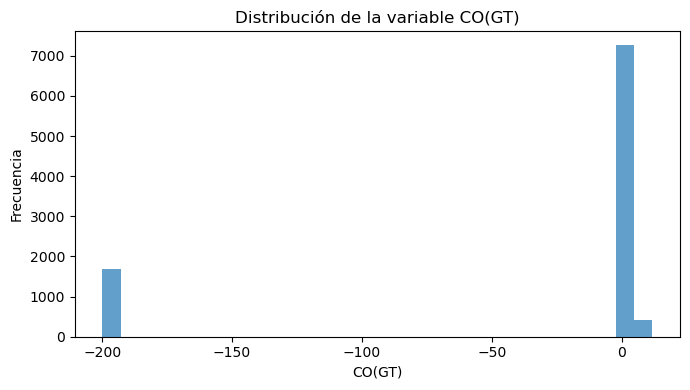

In [18]:
plt.figure(figsize=(7,4))
plt.hist(aire["CO(GT)"], bins=30, alpha=0.7)
plt.xlabel("CO(GT)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la variable CO(GT)")
plt.tight_layout()
plt.show()



En el histograma de la variable CO(GT) se observa una concentración anómala de valores en torno a -200, lo que indica la presencia de mediciones inválidas en el dataset. Gracias a esta visualización se identifica fácilmente este valor atípico, que posteriormente se tratará como un valor nulo para evitar que afecte al rendimiento de los modelos.

In [20]:
print("Mínimo:", aire['CO(GT)'].min())
print("Máximo:", aire['CO(GT)'].max())


Mínimo: -200.0
Máximo: 11.9


Los datos nulos son indicados con el valor -200. Por Lo que lo eliminaremos para evitar añadir ruido. Pues en el dataset se utiliza como codigo para “medición ausente o inválida” y no como valores reales.

In [22]:
aire.replace(to_replace=-200, value=np.nan, inplace=True)

In [23]:
aire.isna().mean()*100

CO(GT)           17.986534
PT08.S1(CO)       3.911510
NMHC(GT)         90.231912
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
NOx(GT)          17.516298
PT08.S3(NOx)      3.911510
NO2(GT)          17.548360
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 3.911510
RH                3.911510
AH                3.911510
hora              0.000000
Dsemana           0.000000
dtype: float64

La variable NMHC(GT) tiene alrededor de un 90 % de valores ausentes, por lo que se considerará inutilizable para el modelado y se eliminará del conjunto de variables.

Para el modelo de regresión con CO(GT) como variable objetivo, eliminaremos las filas que tengan CO(GT) vacío.

Las variables predictoras seleccionadas (sensores químicos (PT08) variables meteorológicas y temporales) tienen en torno a un 4 % de valores faltantes; dado que es un porcentaje bajo, eliminaremos también las filas que tengan NaN en cualquiera de estas columnas, de forma que el modelo se entrene solo con observaciones completas.

In [24]:
aire = aire.drop(columns='NMHC(GT)')

In [25]:
aire.dropna(inplace=True)

In [26]:
aire.isna().mean()

CO(GT)           0.0
PT08.S1(CO)      0.0
C6H6(GT)         0.0
PT08.S2(NMHC)    0.0
NOx(GT)          0.0
PT08.S3(NOx)     0.0
NO2(GT)          0.0
PT08.S4(NO2)     0.0
PT08.S5(O3)      0.0
T                0.0
RH               0.0
AH               0.0
hora             0.0
Dsemana          0.0
dtype: float64

## Análisis visual de los datos


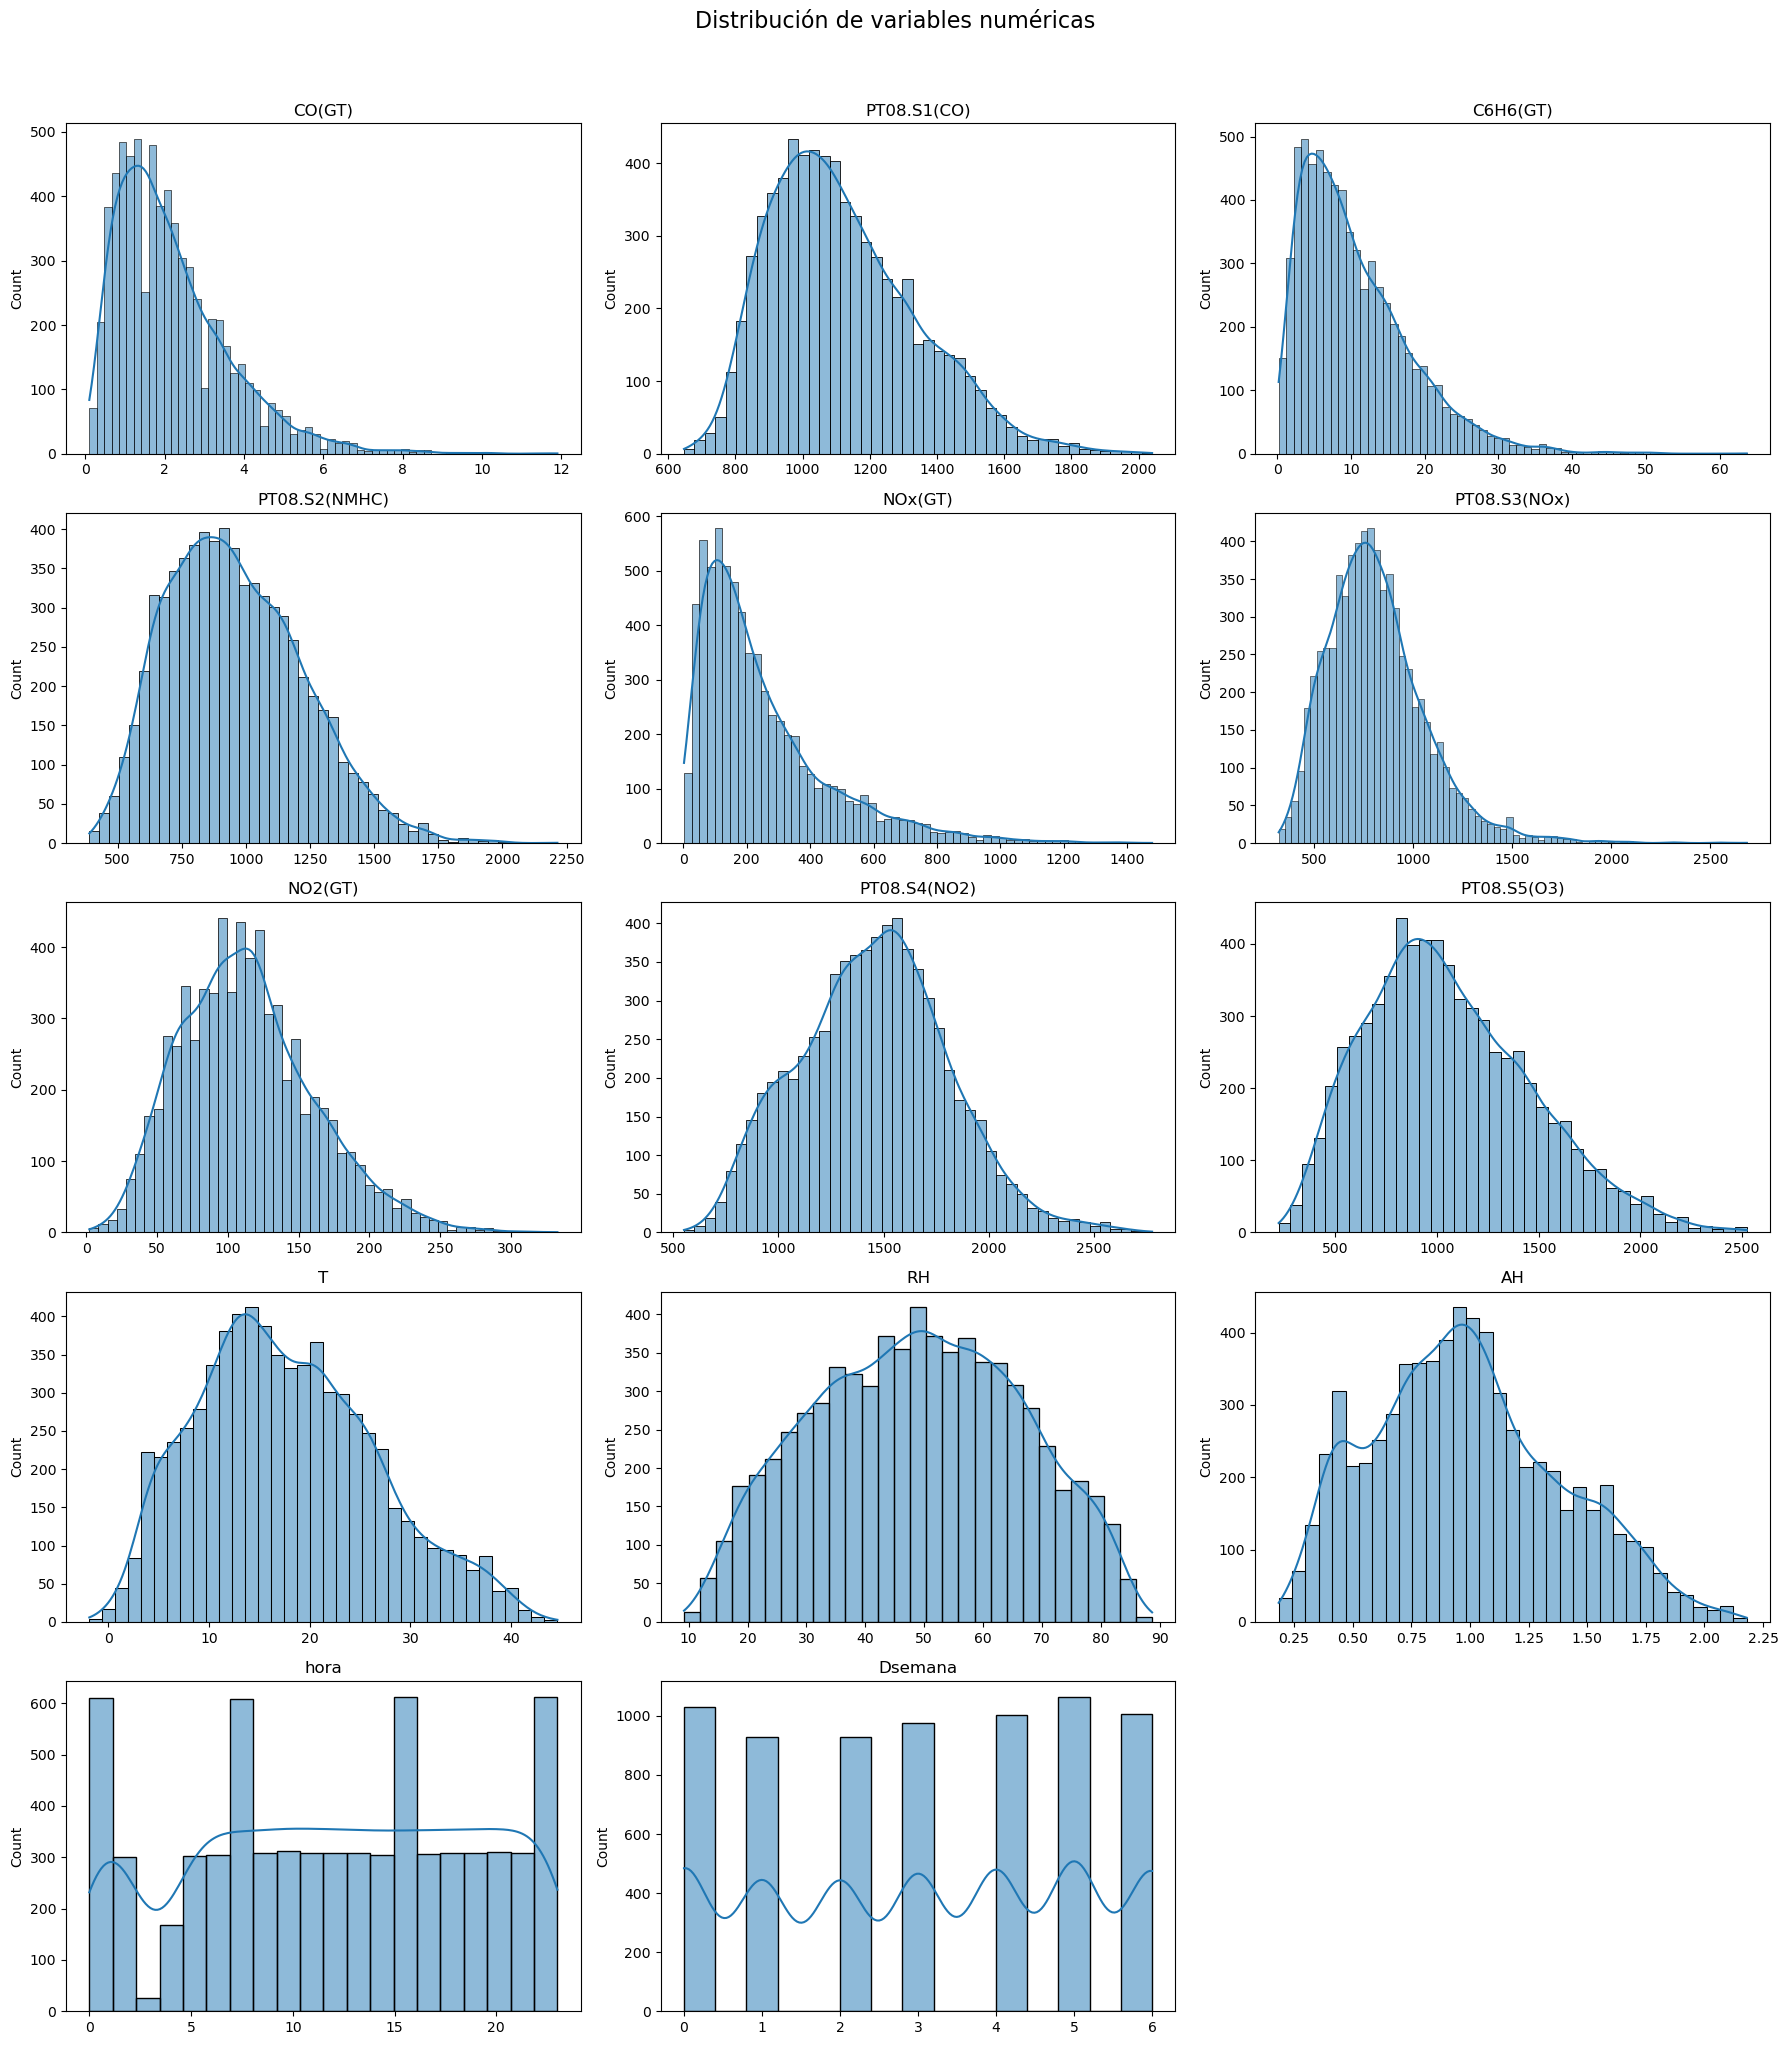

In [27]:
numeric_cols = aire.select_dtypes(include="number").columns
n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(aire[col], kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    
# Eliminar ejes sobrantes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribución de variables numéricas", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


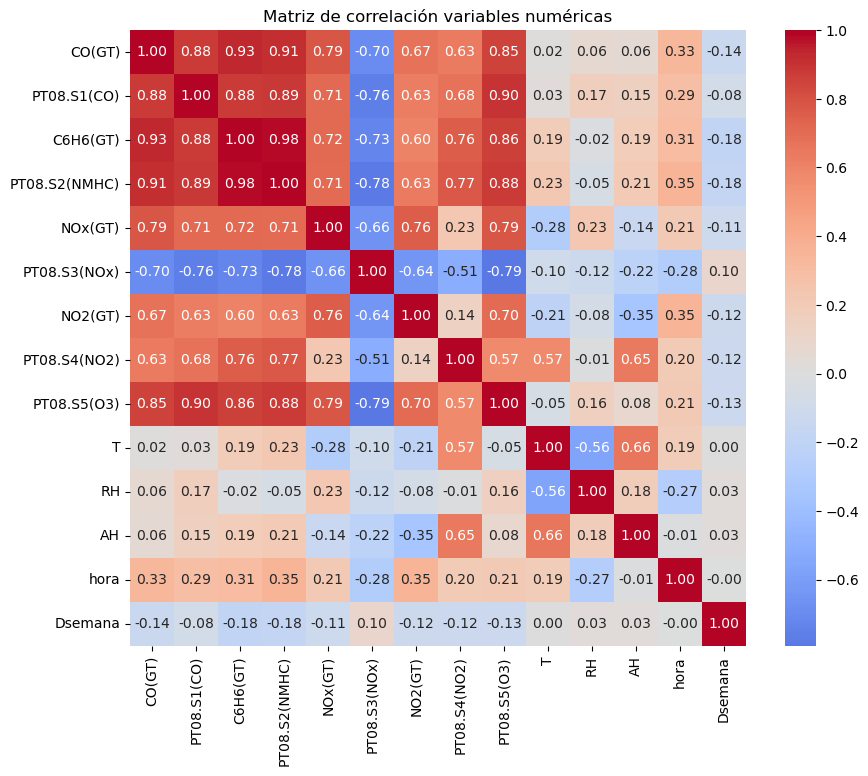

In [30]:
corr = aire[numeric_cols].corr(method="pearson")

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True
)
plt.title("Matriz de correlación variables numéricas")
plt.show()


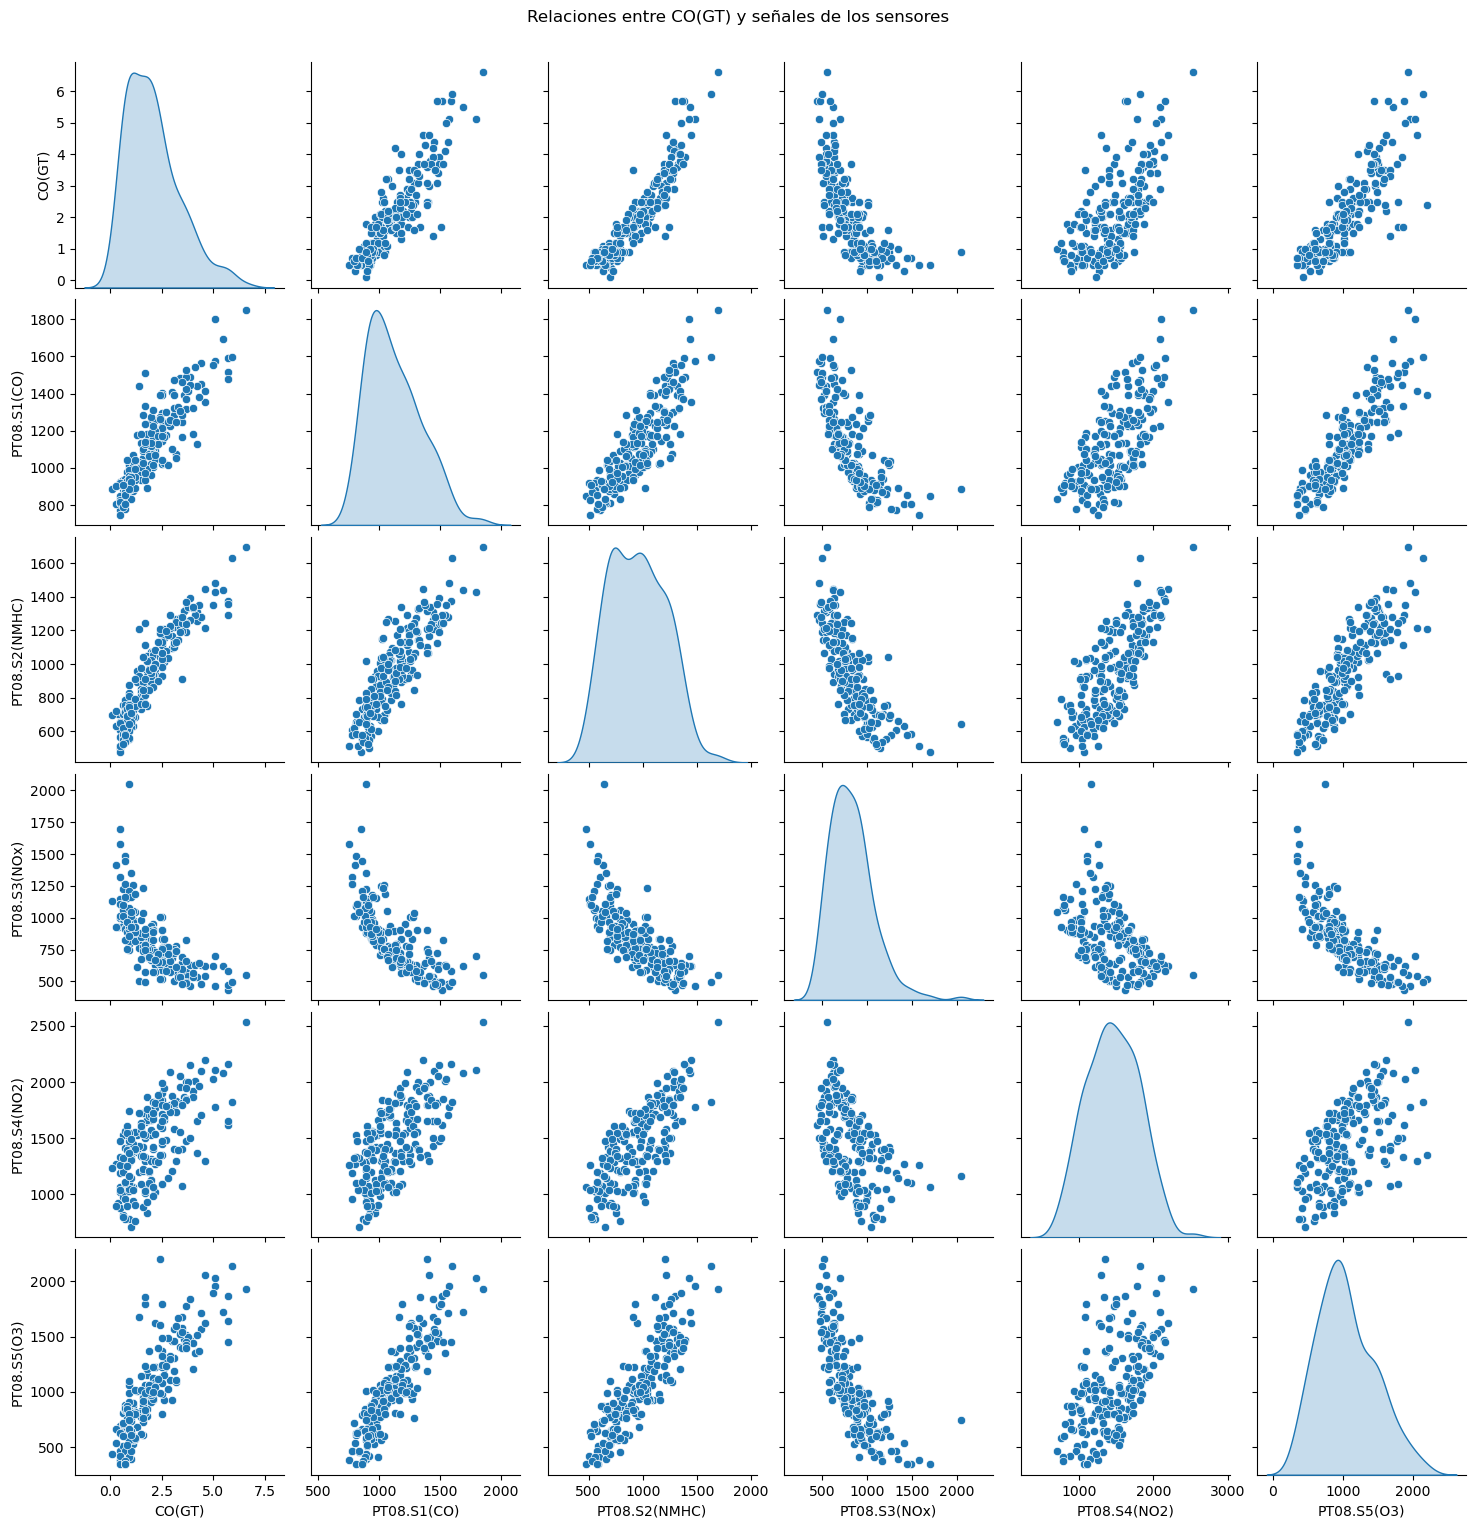

In [36]:
subset_cols = [
    "CO(GT)",
    "PT08.S1(CO)",
    "PT08.S2(NMHC)",
    "PT08.S3(NOx)",
    "PT08.S4(NO2)",
    "PT08.S5(O3)"
]

sample = aire[subset_cols].dropna().sample(200, random_state=0)

sns.pairplot(sample, diag_kind="kde")
plt.suptitle("Relaciones entre CO(GT) y señales de los sensores", y=1.02)
plt.show()


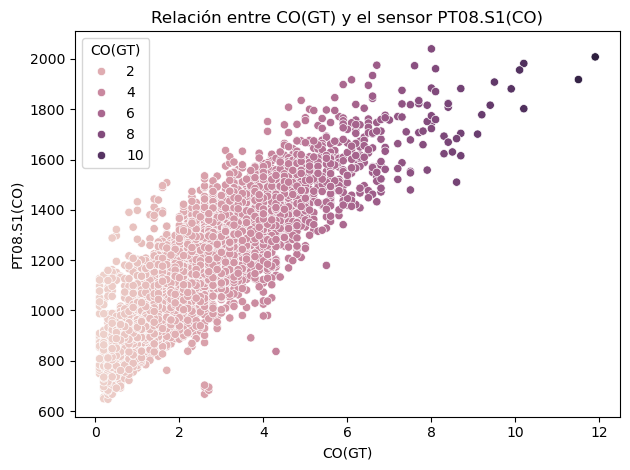

In [29]:
sns.scatterplot(
    data=aire,
    x="CO(GT)",
    y="PT08.S1(CO)",
    hue="CO(GT)"
)

plt.title("Relación entre CO(GT) y el sensor PT08.S1(CO)")
plt.tight_layout()
plt.show()


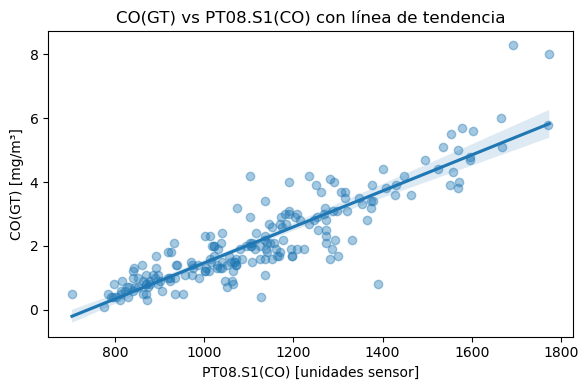

In [38]:
sample = aire.dropna(subset=["CO(GT)", "PT08.S1(CO)"]).sample(200, random_state=42)
plt.figure(figsize=(6, 4))
sns.regplot(
    data=sample,
    x="PT08.S1(CO)",
    y="CO(GT)",
    scatter_kws={"alpha": 0.4}
)
plt.title("CO(GT) vs PT08.S1(CO) con línea de tendencia")
plt.xlabel("PT08.S1(CO) [unidades sensor]")
plt.ylabel("CO(GT) [mg/m³]")
plt.tight_layout()
plt.show()

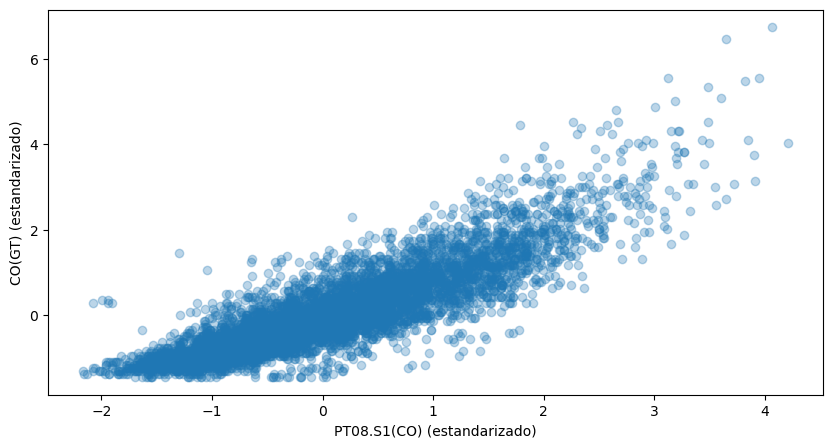

In [39]:
from sklearn.preprocessing import StandardScaler
vars_plot = aire[['PT08.S1(CO)', 'CO(GT)']].dropna()

scaler = StandardScaler()
vars_scaled = scaler.fit_transform(vars_plot)

plt.figure(figsize=(10,5))
plt.scatter(vars_scaled[:,0], vars_scaled[:,1], alpha=0.3)
plt.xlabel('PT08.S1(CO) (estandarizado)')
plt.ylabel('CO(GT) (estandarizado)')
plt.show()

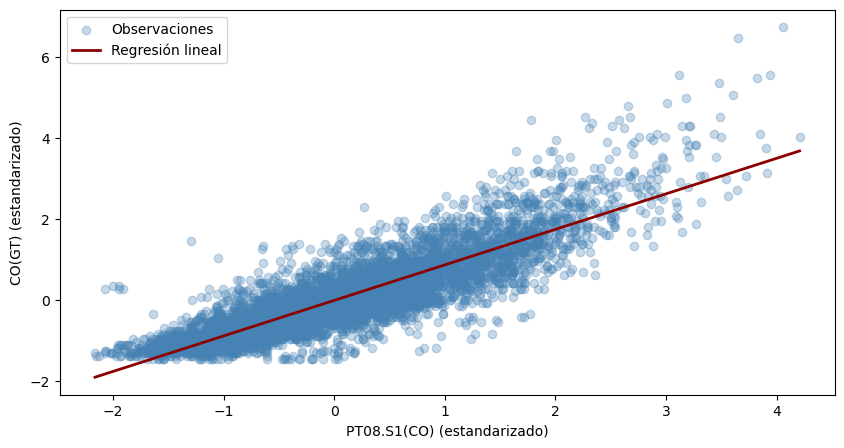

In [44]:
from sklearn.linear_model import LinearRegression

X = vars_scaled[:,0].reshape(-1,1)  
y = vars_scaled[:,1]               

model = LinearRegression()
model.fit(X, y)

x_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_line = model.predict(x_line)

plt.figure(figsize=(10,5))
plt.scatter(X, y, alpha=0.3, color='steelblue', label='Observaciones')
plt.plot(x_line, y_line, color='darkred', linewidth=2, label='Regresión lineal')

plt.xlabel('PT08.S1(CO) (estandarizado)')
plt.ylabel('CO(GT) (estandarizado)')
plt.legend()
plt.show()

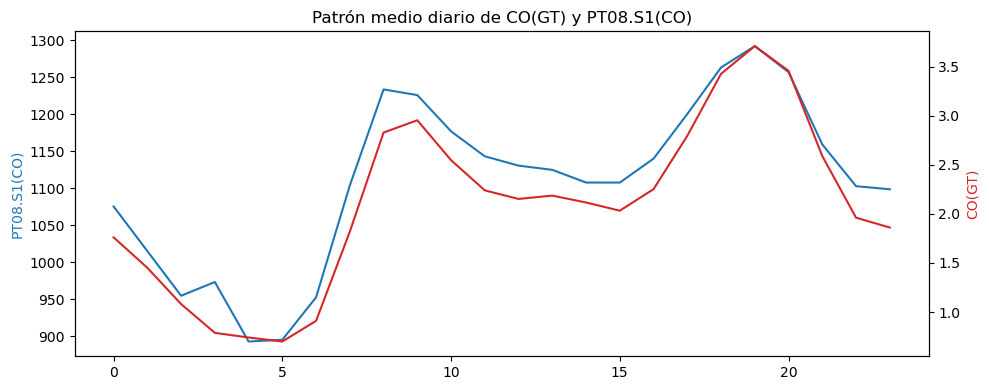

In [42]:
media_hora = aire.groupby("hora")[["CO(GT)", "PT08.S1(CO)"]].mean()

fig, ax1 = plt.subplots(figsize=(10,4))

ax1.plot(media_hora.index, media_hora["PT08.S1(CO)"], color="tab:blue")
ax1.set_ylabel("PT08.S1(CO)", color="tab:blue")

ax2 = ax1.twinx()
ax2.plot(media_hora.index, media_hora["CO(GT)"], color="tab:red")
ax2.set_ylabel("CO(GT)", color="tab:red")

plt.xlabel("Hora del día")
plt.title("Patrón medio diario de CO(GT) y PT08.S1(CO)")
plt.tight_layout()
plt.show()



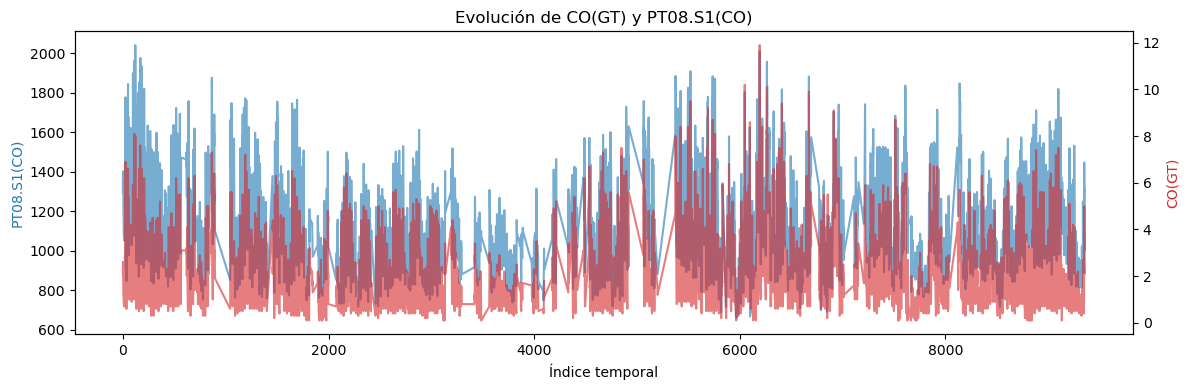

In [43]:
fig, ax1 = plt.subplots(figsize=(12,4))

ax1.plot(aire.index, aire["PT08.S1(CO)"], color="tab:blue", alpha=0.6)
ax1.set_ylabel("PT08.S1(CO)", color="tab:blue")

ax2 = ax1.twinx()
ax2.plot(aire.index, aire["CO(GT)"], color="tab:red", alpha=0.6)
ax2.set_ylabel("CO(GT)", color="tab:red")

ax1.set_xlabel("Índice temporal")
plt.title("Evolución de CO(GT) y PT08.S1(CO)")
plt.tight_layout()
plt.show()


## Regresión lineal – Modelo A

En el Modelo A se entrena una regresión lineal utilizando como variables explicativas los sensores de contaminación y las variables meteorológicas, incluyendo el sensor PT08.S1(CO). El modelo se ajusta sobre un conjunto de entrenamiento definido mediante un split manual y se evalúa sobre un conjunto de test posterior. Este modelo sirve como referencia para analizar la capacidad predictiva de una relación lineal entre las variables y la concentración de CO(GT).

In [46]:
DatosA = ['PT08.S1(CO)', 'PT08.S2(NMHC)',
       'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH']
df_A = aire[DatosA].copy()

In [47]:
df_A.head(1)

PT08.S1(CO)  PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  PT08.S5(O3)     T  \
0       1360.0         1046.0        1056.0        1692.0       1268.0  13.6   

     RH      AH  
0  48.9  0.7578

In [48]:
y_A = aire.loc[df_A.index, 'CO(GT)']

In [49]:
X_A = df_A[DatosA]

In [50]:
X_A.shape, y_A.shape

((6941, 8), (6941,))

**Separación**

In [51]:
split = int(len(X_A) * 0.8)

X_A_train = X_A.iloc[:split]
X_A_test  = X_A.iloc[split:]

y_A_train = y_A.iloc[:split]
y_A_test  = y_A.iloc[split:]


In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [53]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])


In [54]:
pipe.fit(X_A_train, y_A_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [55]:
y_A_pred = pipe.predict(X_A_test)

**Métricas Evaluación Regresión Modelo A** 

In [56]:
r2 = r2_score(y_A_test, y_A_pred)
mae = mean_absolute_error(y_A_test, y_A_pred)
rmse = np.sqrt(mean_squared_error(y_A_test, y_A_pred))

print('Metricas Modelo A')
print("R²:", r2)
print("MAE:", mae)
print("RMSE:", rmse)


Metricas Modelo A
R²: 0.8604834774504294
MAE: 0.34553781061122557
RMSE: 0.48856097742064664


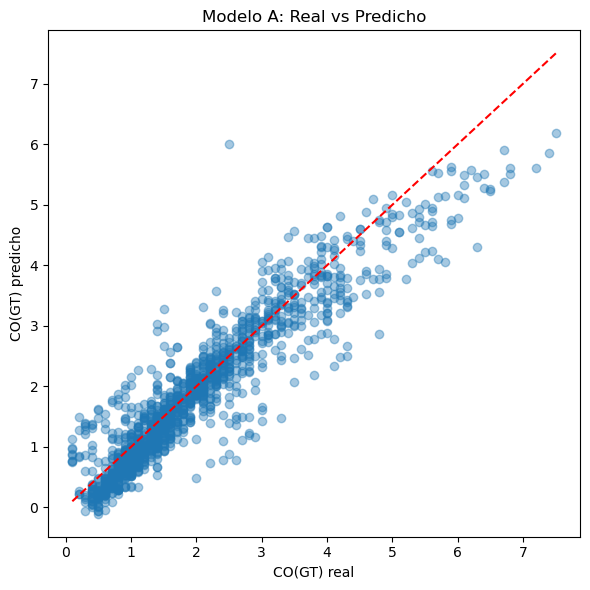

In [58]:
plt.figure(figsize=(6,6))
plt.scatter(y_A_test, y_A_pred, alpha=0.4)
plt.plot([y_A_test.min(), y_A_test.max()],
         [y_A_test.min(), y_A_test.max()],
         linestyle='--', color='red')

plt.xlabel("CO(GT) real")
plt.ylabel("CO(GT) predicho")
plt.title("Modelo A: Real vs Predicho")
plt.tight_layout()
plt.show()


In [59]:
import statsmodels.api as sm

In [60]:
X_train_sm = sm.add_constant(X_A_train)

In [61]:
model_ols = sm.OLS(y_A_train, X_train_sm)
results = model_ols.fit()


In [62]:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CO(GT)   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     5620.
Date:                Tue, 16 Dec 2025   Prob (F-statistic):               0.00
Time:                        19:55:58   Log-Likelihood:                -3878.8
No. Observations:                5552   AIC:                             7776.
Df Residuals:                    5543   BIC:                             7835.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.3585      0.110    -39.477      0.000      -4.575      -4.142
PT08.S1(CO)       0.0017   8.45e-05     20.253      0.000       0.002       0.002
PT08.S2(NMHC)     0.0053   9.76e-05     54.640      0.000       0.005       0.006
PT08.S3(NOx)      0.0009   5.32e-05     16.519      0.000       0.001       0.001
PT08.S4(NO2)     -0.0006   5.62e-05     -9.795      0.000      -0.001      -0.000
PT08.S5(O3)      -0.0002   4.84e-05     -3.122      0.002      -0.000   -5.63e-05
T                -0.0258      0.003     -9.047      0.000      -0.031      -0.020
RH               -0.0009      0.001     -0.809      0.419      -0.003       0.001
AH                0.2366      0.052      4.574      0.000       0.135       0.338
==============================================================================
Omnibus:                     1093.300   Durbin-Watson:                   0.494
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35272.479
Skew:                           0.015   Prob(JB):                         0.00
Kurtosis:                      15.348   Cond. No.                     4.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
resumen = pd.DataFrame({
    "coef": results.params,
    "p_value": results.pvalues
})

resumen

coef        p_value
const         -4.358454  1.394575e-300
PT08.S1(CO)    0.001712   4.827682e-88
PT08.S2(NMHC)  0.005331   0.000000e+00
PT08.S3(NOx)   0.000879   7.057515e-60
PT08.S4(NO2)  -0.000551   1.799567e-22
PT08.S5(O3)   -0.000151   1.807716e-03
T             -0.025791   1.990680e-19
RH            -0.000902   4.186714e-01
AH             0.236623   4.881027e-06

## Regresión lineal – Modelo B

En el Modelo B se entrena una regresión lineal utilizando el mismo conjunto de entrenamiento y test que en el Modelo A, pero excluyendo la variable PT08.S1(CO) del conjunto de variables explicativas. El objetivo de este modelo es evaluar el impacto de dicho sensor en la capacidad predictiva del modelo, manteniendo constantes el resto de condiciones y permitiendo una comparación justa entre ambos enfoques.

Creamos X_B eliminando PT08.S1(CO)

In [65]:
X_B = X_A.drop(columns=["PT08.S1(CO)"])


**Separación**

In [66]:
X_B_train = X_B.iloc[:split]
X_B_test  = X_B.iloc[split:]

y_B_train = y_A.iloc[:split]
y_B_test  = y_A.iloc[split:]


In [68]:


X_B.shape, y_A.shape

((6941, 7), (6941,))

In [69]:
pipe_B = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])


In [70]:
pipe_B.fit(X_B_train, y_B_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

**Métricas Evaluación Regresión Modelo B** 

In [71]:
y_B_pred = pipe_B.predict(X_B_test)

r2_B = r2_score(y_B_test, y_B_pred)
mae_B = mean_absolute_error(y_B_test, y_B_pred)
rmse_B = np.sqrt(mean_squared_error(y_B_test, y_B_pred))

print("MODELO B (sin PT08.S1)")
print("R²:", r2_B)
print("MAE:", mae_B)
print("RMSE:", rmse_B)


MODELO B (sin PT08.S1)
R²: 0.8338932888601676
MAE: 0.40072573408988327
RMSE: 0.5330887826150348


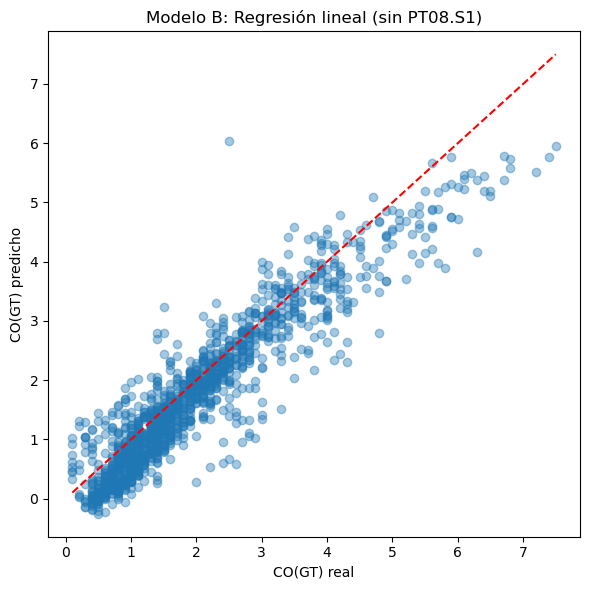

In [72]:
plt.figure(figsize=(6,6))
plt.scatter(y_B_test, y_B_pred, alpha=0.4)
plt.plot(
    [y_B_test.min(), y_B_test.max()],
    [y_B_test.min(), y_B_test.max()],
    '--', color='red'
)

plt.xlabel("CO(GT) real")
plt.ylabel("CO(GT) predicho")
plt.title("Modelo B: Regresión lineal (sin PT08.S1)")
plt.tight_layout()
plt.show()


In [74]:
X_B_train_sm = sm.add_constant(X_B_train)
model_B_ols = sm.OLS(y_B_train, X_B_train_sm)
results_B = model_B_ols.fit()
results_B.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CO(GT)   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     5926.
Date:                Tue, 16 Dec 2025   Prob (F-statistic):               0.00
Time:                        20:01:04   Log-Likelihood:                -4077.0
No. Observations:                5552   AIC:                             8170.
Df Residuals:                    5544   BIC:                             8223.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.8072      0.111    -34.338      0.000      -4.025      -3.590
PT08.S2(NMHC)     0.0057   9.91e-05     57.786      0.000       0.006       0.006
PT08.S3(NOx)      0.0008   5.51e-05     15.376      0.000       0.001       0.001
PT08.S4(NO2)     -0.0002   5.48e-05     -2.996      0.003      -0.000   -5.68e-05
PT08.S5(O3)       0.0002   4.58e-05      5.439      0.000       0.000       0.000
T                -0.0258      0.003     -8.750      0.000      -0.032      -0.020
RH                0.0024      0.001      2.078      0.038       0.000       0.005
AH                0.0802      0.053      1.513      0.130      -0.024       0.184
==============================================================================
Omnibus:                     1119.402   Durbin-Watson:                   0.483
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38099.144
Skew:                          -0.071   Prob(JB):                         0.00
Kurtosis:                      15.833   Cond. No.                     3.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
resumen_B = pd.DataFrame({
    "coef_B": results_B.params,
    "p_value_B": results_B.pvalues
})

resumen_B


coef_B      p_value_B
const         -3.807193  1.857374e-234
PT08.S2(NMHC)  0.005725   0.000000e+00
PT08.S3(NOx)   0.000847   2.799867e-52
PT08.S4(NO2)  -0.000164   2.745663e-03
PT08.S5(O3)    0.000249   5.592625e-08
T             -0.025847   2.790905e-18
RH             0.002377   3.775808e-02
AH             0.080218   1.302168e-01

In [76]:
X_A_train_sm = sm.add_constant(X_A_train)
model_A_ols = sm.OLS(y_A_train, X_A_train_sm)
results_A = model_A_ols.fit()

resumen_A = pd.DataFrame({
    "coef_A": results_A.params,
    "p_value_A": results_A.pvalues
})


In [77]:
comparacion_pvalores = resumen_A.join(resumen_B, how="outer")
comparacion_pvalores


coef_A      p_value_A    coef_B      p_value_B
AH             0.236623   4.881027e-06  0.080218   1.302168e-01
PT08.S1(CO)    0.001712   4.827682e-88       NaN            NaN
PT08.S2(NMHC)  0.005331   0.000000e+00  0.005725   0.000000e+00
PT08.S3(NOx)   0.000879   7.057515e-60  0.000847   2.799867e-52
PT08.S4(NO2)  -0.000551   1.799567e-22 -0.000164   2.745663e-03
PT08.S5(O3)   -0.000151   1.807716e-03  0.000249   5.592625e-08
RH            -0.000902   4.186714e-01  0.002377   3.775808e-02
T             -0.025791   1.990680e-19 -0.025847   2.790905e-18
const         -4.358454  1.394575e-300 -3.807193  1.857374e-234

## SGDRegressor – Modelo A (sin tuning)

En el Modelo A se entrena un SGDRegressor, que es una regresión lineal ajustada mediante descenso por gradiente. Se utiliza un pipeline con estandarización (StandardScaler) para que todas las variables estén en la misma escala y el entrenamiento sea estable. El modelo se entrena con el split temporal definido y se evalúa en el test. Los resultados son muy similares a la regresión lineal clásica, lo que indica que el problema es mayoritariamente lineal y que el método de optimización no cambia demasiado el rendimiento.

In [ ]:
from sklearn.linear_model import SGDRegressor

pipe_sgd = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd", SGDRegressor(
        loss="squared_error",
        penalty=None,       
        max_iter=5000,
        tol=1e-4,
        random_state=42
    ))
])


In [79]:
pipe_sgd.fit(X_A_train, y_A_train)
y_pred_sgd = pipe_sgd.predict(X_A_test)


**Métricas Evaluación SGD Regressor Modelo A (sin tuning)** 

In [149]:
mae_sgd = mean_absolute_error(y_A_test, y_pred_sgd)
mse_sgd = mean_squared_error(y_A_test, y_pred_sgd)
rmse_sgd = np.sqrt(mse_sgd)

print("SGDRegressor – Modelo A (sin tuning)")
print("MAE SGD:", mae_sgd)
print("RMSE SGD:", rmse_sgd)


SGDRegressor – Modelo A (sin tuning)
MAE SGD: 0.3447275615702744
RMSE SGD: 0.48595177637964965


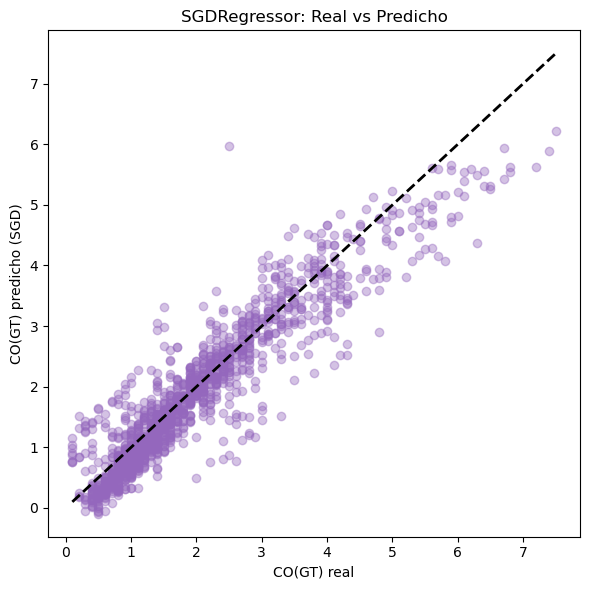

In [83]:
plt.figure(figsize=(6,6))
plt.scatter(y_A_test, y_pred_sgd, alpha=0.4, color="tab:purple")
plt.plot(
    [y_A_test.min(), y_A_test.max()],
    [y_A_test.min(), y_A_test.max()],
    "--", color="black", linewidth=2
)

plt.xlabel("CO(GT) real")
plt.ylabel("CO(GT) predicho (SGD)")
plt.title("SGDRegressor: Real vs Predicho")
plt.tight_layout()
plt.show()


## SGDRegressor – Modelo A (tuneado)

Además, se realiza un ajuste de hiperparámetros del SGDRegressor para mejorar la convergencia del modelo, probando distintas configuraciones de tasa de aprendizaje (eta0), tipo de learning rate y número de iteraciones. El mejor modelo obtenido utiliza eta0 = 0.01, learning_rate = "adaptive" y max_iter = 2000. Tras entrenarlo con el conjunto de entrenamiento, se evalúa en el test para comparar si el tuning aporta mejoras frente a la versión base.

In [137]:
from sklearn.linear_model import SGDRegressor

pipe_sgd = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd", SGDRegressor(
        loss="squared_error",
        penalty=None,
        random_state=42
    ))
])


In [138]:
param_grid = {
    "sgd__eta0": [0.001, 0.01, 0.1],
    "sgd__learning_rate": ["constant", "adaptive"],
    "sgd__max_iter": [2000, 5000, 10000]
}


In [139]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

tscv = TimeSeriesSplit(n_splits=5)

grid_sgd = GridSearchCV(
    pipe_sgd,
    param_grid=param_grid,
    cv=tscv,   # validación temporal SOLO en train
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

In [140]:
grid_sgd.fit(X_A_train, y_A_train)


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('sgd',
                                        SGDRegressor(penalty=None,
                                                     random_state=42))]),
             n_jobs=-1,
             param_grid={'sgd__eta0': [0.001, 0.01, 0.1],
                         'sgd__learning_rate': ['constant', 'adaptive'],
                         'sgd__max_iter': [2000, 5000, 10000]},
             scoring='neg_root_mean_squared_error')

In [151]:

print("Mejores parámetros:", grid_sgd.best_params_)
print("RMSE CV:", -grid_sgd.best_score_)

Mejores parámetros: {'sgd__eta0': 0.01, 'sgd__learning_rate': 'adaptive', 'sgd__max_iter': 2000}
RMSE CV: 0.5341357101334285


In [142]:
pipe_sgd_final = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd", SGDRegressor(
        loss="squared_error",
        penalty=None,
        learning_rate="adaptive",
        eta0=0.01,
        max_iter=2000,
        tol=1e-4,
        random_state=42
    ))
])


In [143]:
pipe_sgd_final.fit(X_A_train, y_A_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd',
                 SGDRegressor(learning_rate='adaptive', max_iter=2000,
                              penalty=None, random_state=42, tol=0.0001))])

In [144]:
y_pred_sgd_final = pipe_sgd_final.predict(X_A_test)


**Métricas Evaluación SGD Regressor Modelo A (con tuning)** 

In [153]:
mae_final  = mean_absolute_error(y_A_test, y_pred_sgd_final)
rmse_final = np.sqrt(mean_squared_error(y_A_test, y_pred_sgd_final))
print("SGDRegressor – Modelo A (CON tuning)")
print("MAE SGD final:", mae_final)
print("RMSE SGD final:", rmse_final)

SGDRegressor – Modelo A (CON tuning)
MAE SGD final: 0.3461788205238774
RMSE SGD final: 0.4890856554718048


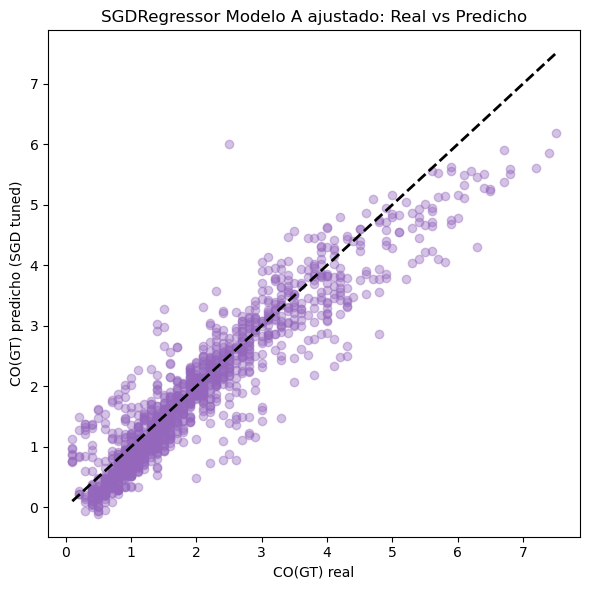

In [146]:
plt.figure(figsize=(6,6))

plt.scatter(
    y_A_test,
    y_pred_sgd_final,
    alpha=0.4,
    color="tab:purple"
)

# Línea ideal y = x
plt.plot(
    [y_A_test.min(), y_A_test.max()],
    [y_A_test.min(), y_A_test.max()],
    "--",
    color="black",
    linewidth=2
)

plt.xlabel("CO(GT) real")
plt.ylabel("CO(GT) predicho (SGD tuned)")
plt.title("SGDRegressor Modelo A ajustado: Real vs Predicho")
plt.tight_layout()
plt.show()


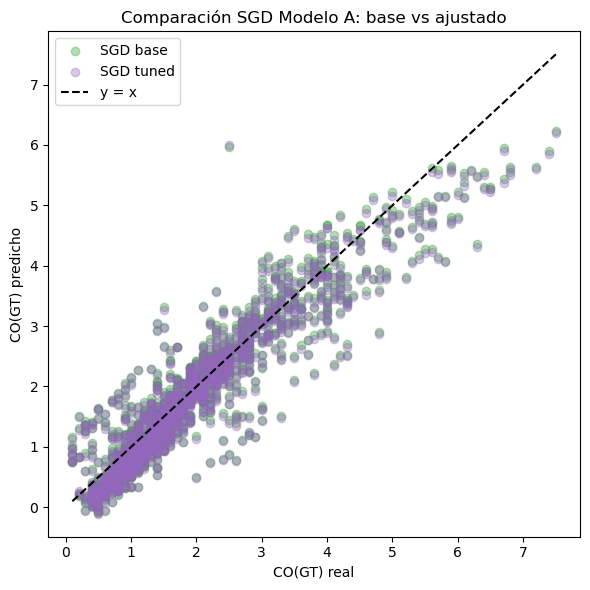

In [147]:
plt.figure(figsize=(6,6))

plt.scatter(y_A_test, y_pred_sgd, alpha=0.35, color="tab:green", label="SGD base")
plt.scatter(y_A_test, y_pred_sgd_final, alpha=0.35, color="tab:purple", label="SGD tuned")

plt.plot(
    [y_A_test.min(), y_A_test.max()],
    [y_A_test.min(), y_A_test.max()],
    "--",
    color="black",
    label="y = x"
)

plt.xlabel("CO(GT) real")
plt.ylabel("CO(GT) predicho")
plt.title("Comparación SGD Modelo A: base vs ajustado")
plt.legend()
plt.tight_layout()
plt.show()


## SGD Regressor B

In [84]:
X_B = X_A.drop(columns=["PT08.S1(CO)"])


In [85]:
X_B_train = X_B.iloc[:split]
X_B_test  = X_B.iloc[split:]

y_B_train = y_A_train   # misma y
y_B_test  = y_A_test


In [86]:
pipe_sgd_B = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd", SGDRegressor(
        loss="squared_error",
        penalty=None,
        max_iter=5000,
        tol=1e-4,
        random_state=42
    ))
])


In [87]:
pipe_sgd_B.fit(X_B_train, y_B_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd',
                 SGDRegressor(max_iter=5000, penalty=None, random_state=42,
                              tol=0.0001))])

**Métricas Evaluación SGD Regressor Modelo B (sin tuning)** 

In [155]:
y_pred_sgd_B = pipe_sgd_B.predict(X_B_test)

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_sgd_B  = mean_absolute_error(y_B_test, y_pred_sgd_B)
rmse_sgd_B = np.sqrt(mean_squared_error(y_B_test, y_pred_sgd_B))

print(" SGD Regressor Modelo B (sin tuning)")
print("MAE SGD sin PT08.S1:", mae_sgd_B)
print("RMSE SGD sin PT08.S1:", rmse_sgd_B)


 SGD Regressor Modelo B (sin tuning)
MAE SGD sin PT08.S1: 0.39899513880613724
RMSE SGD sin PT08.S1: 0.5303512301862762


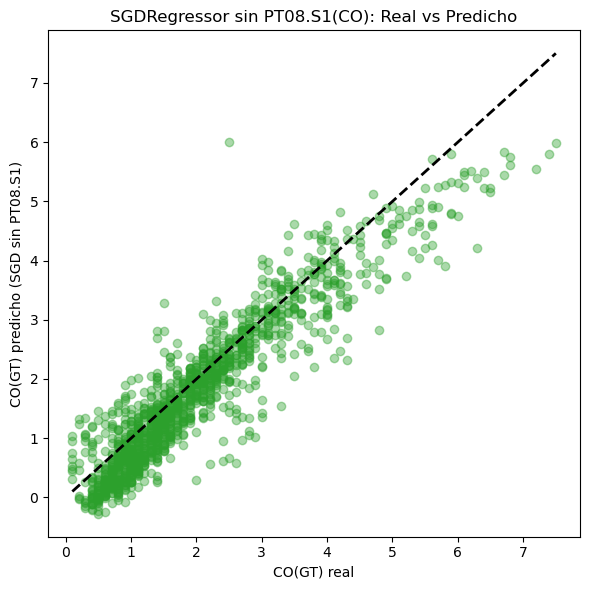

In [90]:
plt.figure(figsize=(6,6))

plt.scatter(
    y_B_test,
    y_pred_sgd_B,
    alpha=0.4,
    color="tab:green"
)

# Línea ideal y = x
plt.plot(
    [y_B_test.min(), y_B_test.max()],
    [y_B_test.min(), y_B_test.max()],
    "--",
    color="black",
    linewidth=2
)

plt.xlabel("CO(GT) real")
plt.ylabel("CO(GT) predicho (SGD sin PT08.S1)")
plt.title("SGDRegressor sin PT08.S1(CO): Real vs Predicho")
plt.tight_layout()
plt.show()


## Comparar SGD con y sin PT08.S1

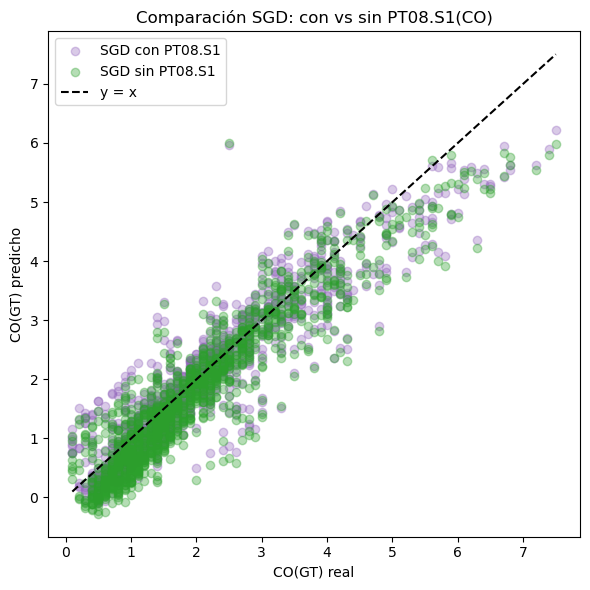

In [91]:
plt.figure(figsize=(6,6))

plt.scatter(y_A_test, y_pred_sgd, alpha=0.35, color="tab:purple", label="SGD con PT08.S1")
plt.scatter(y_B_test, y_pred_sgd_B, alpha=0.35, color="tab:green", label="SGD sin PT08.S1")

plt.plot(
    [y_A_test.min(), y_A_test.max()],
    [y_A_test.min(), y_A_test.max()],
    "--",
    color="black",
    label="y = x"
)

plt.xlabel("CO(GT) real")
plt.ylabel("CO(GT) predicho")
plt.title("Comparación SGD: con vs sin PT08.S1(CO)")
plt.legend()
plt.tight_layout()
plt.show()


## SGDRegressor – Modelo B (tuneado)

Por último, también se realiza tuning del SGDRegressor para el Modelo B con el objetivo de encontrar una configuración que entrene de forma más eficiente. El mejor conjunto de hiperparámetros coincide con el del Modelo A (eta0 = 0.01, learning_rate = "adaptive", max_iter = 2000). Tras entrenar el modelo final con estos parámetros, se evalúa en el mismo test para comprobar si el ajuste mejora los resultados y comparar con la versión sin tuning.

In [112]:
param_grid = {
    "sgd__eta0": [0.001, 0.01, 0.1],
    "sgd__learning_rate": ["constant", "adaptive"],
    "sgd__max_iter": [2000, 5000]
}

pipe_sgd_base = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd", SGDRegressor(
        loss="squared_error",
        penalty=None,
        random_state=42
    ))
])

tscv = TimeSeriesSplit(n_splits=5)

grid_sgd_B = GridSearchCV(
    pipe_sgd_base,
    param_grid=param_grid,
    cv=tscv,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)


In [113]:
grid_sgd_B.fit(X_B_train, y_B_train)

print("Mejores parámetros (Modelo B):", grid_sgd_B.best_params_)
print("RMSE CV (Modelo B):", -grid_sgd_B.best_score_)


Mejores parámetros (Modelo B): {'sgd__eta0': 0.01, 'sgd__learning_rate': 'adaptive', 'sgd__max_iter': 2000}
RMSE CV (Modelo B): 0.5713871075276102


**Modelo B tuneado**

In [114]:
pipe_sgd_B_final = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd", SGDRegressor(
        loss="squared_error",
        penalty=None,
        learning_rate="adaptive",
        eta0=0.01,
        max_iter=2000,
        tol=1e-4,
        random_state=42
    ))
])

In [115]:
pipe_sgd_B_final.fit(X_B_train, y_B_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd',
                 SGDRegressor(learning_rate='adaptive', max_iter=2000,
                              penalty=None, random_state=42, tol=0.0001))])

In [116]:
y_pred_sgd_B_final = pipe_sgd_B_final.predict(X_B_test)


**Métricas Evaluación SGD Regressor Modelo B (con tuning)** 

In [157]:
mae_B_final  = mean_absolute_error(y_B_test, y_pred_sgd_B_final)
rmse_B_final = np.sqrt(mean_squared_error(y_B_test, y_pred_sgd_B_final))
print("SGD Regressor Modelo B (con tuning)")
print("MAE SGD Modelo B final:", mae_B_final)
print("RMSE SGD Modelo B final:", rmse_B_final)


SGD Regressor Modelo B (con tuning)
MAE SGD Modelo B final: 0.40082867957431134
RMSE SGD Modelo B final: 0.5331692532308194


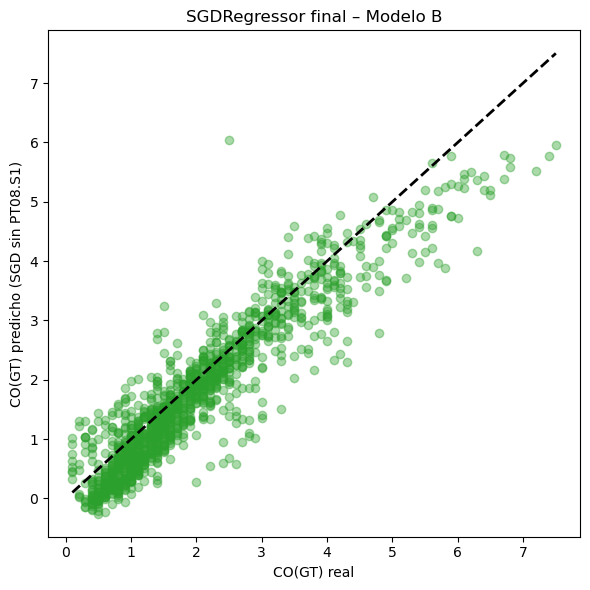

In [118]:
plt.figure(figsize=(6,6))

plt.scatter(
    y_B_test,
    y_pred_sgd_B_final,
    alpha=0.4,
    color="tab:green"
)

plt.plot(
    [y_B_test.min(), y_B_test.max()],
    [y_B_test.min(), y_B_test.max()],
    "--",
    color="black",
    linewidth=2
)

plt.xlabel("CO(GT) real")
plt.ylabel("CO(GT) predicho (SGD sin PT08.S1)")
plt.title("SGDRegressor final – Modelo B")
plt.tight_layout()
plt.show()


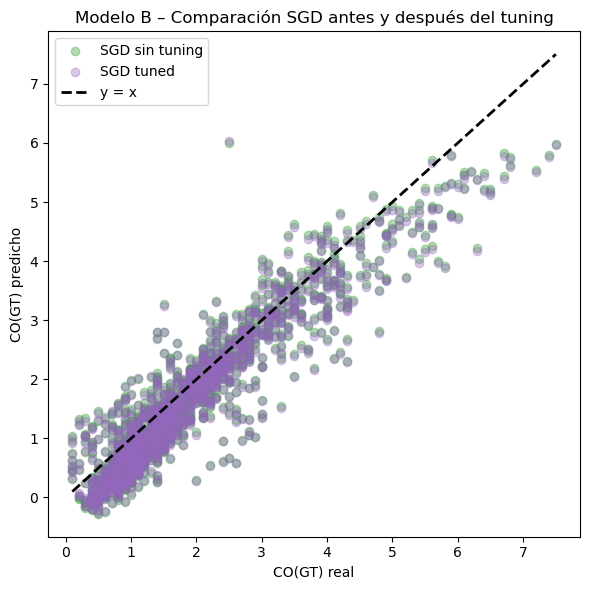

In [119]:
plt.figure(figsize=(6,6))

# SGD sin tuning
plt.scatter(
    y_B_test,
    y_pred_sgd_B,
    alpha=0.35,
    color="tab:green",
    label="SGD sin tuning"
)

# SGD con tuning
plt.scatter(
    y_B_test,
    y_pred_sgd_B_final,
    alpha=0.35,
    color="tab:purple",
    label="SGD tuned"
)

# Línea ideal
plt.plot(
    [y_B_test.min(), y_B_test.max()],
    [y_B_test.min(), y_B_test.max()],
    "--",
    color="black",
    linewidth=2,
    label="y = x"
)

plt.xlabel("CO(GT) real")
plt.ylabel("CO(GT) predicho")
plt.title("Modelo B – Comparación SGD antes y después del tuning")
plt.legend()
plt.tight_layout()
plt.show()


## Random Forest – Modelo A (sin tuning)

En el Modelo A se entrena un modelo Random Forest Regressor utilizando las variables explicativas que incluyen el sensor PT08.S1(CO) junto con el resto de sensores y variables meteorológicas. El modelo se ajusta con una configuración inicial sin realizar ajuste de hiperparámetros, usando un número fijo de árboles y una profundidad limitada para evitar sobreajuste. Este modelo permite capturar relaciones no lineales entre las variables y la concentración de CO(GT).

In [120]:
from sklearn.ensemble import RandomForestRegressor

rf_base = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

rf_base.fit(X_A_train, y_A_train)


RandomForestRegressor(max_depth=12, min_samples_leaf=5, n_estimators=300,
                      n_jobs=-1, random_state=42)

**Métricas Evaluación Random Forest Modelo A (sin tuning)** 

In [158]:
y_pred_rf = rf_base.predict(X_A_test)

mae_rf  = mean_absolute_error(y_A_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_A_test, y_pred_rf))

print("Random Forest Modelo A (sin tuning) ")
print("RF sin tuning – MAE:", mae_rf)
print("RF sin tuning – RMSE:", rmse_rf)


Random Forest Modelo A (sin tuning) 
RF sin tuning – MAE: 0.3332754726021966
RF sin tuning – RMSE: 0.4967726981129433


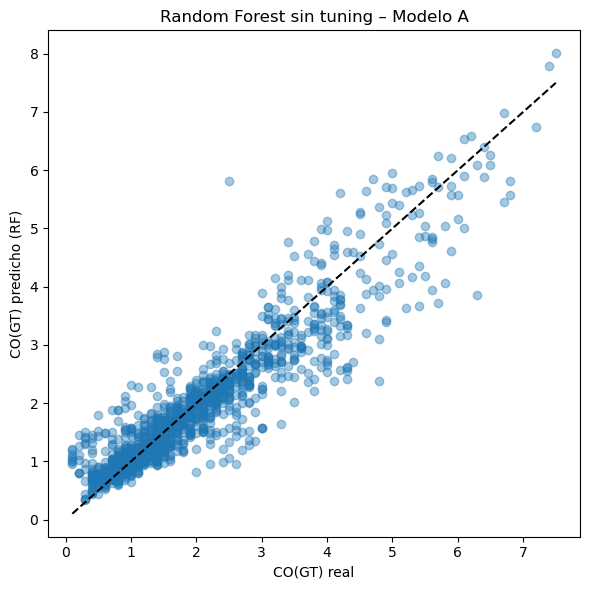

In [122]:
plt.figure(figsize=(6,6))
plt.scatter(y_A_test, y_pred_rf, alpha=0.4, color="tab:blue")

plt.plot(
    [y_A_test.min(), y_A_test.max()],
    [y_A_test.min(), y_A_test.max()],
    "--", color="black"
)

plt.xlabel("CO(GT) real")
plt.ylabel("CO(GT) predicho (RF)")
plt.title("Random Forest sin tuning – Modelo A")
plt.tight_layout()
plt.show()


## Random Forest – Modelo A (tuneado)

Posteriormente, se realiza un ajuste de hiperparámetros del modelo Random Forest con el objetivo de mejorar su rendimiento predictivo. Se prueban distintas configuraciones de número de árboles, profundidad máxima y tamaño mínimo de las hojas.

In [123]:
param_grid_rf = {
    "n_estimators": [200, 300],
    "max_depth": [8, 12, 16],
    "min_samples_leaf": [3, 5, 10]
}

tscv = TimeSeriesSplit(n_splits=5)

rf = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

grid_rf = GridSearchCV(
    rf,
    param_grid=param_grid_rf,
    cv=tscv,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)


In [124]:
grid_rf.fit(X_A_train, y_A_train)

print("Mejores parámetros RF:", grid_rf.best_params_)
print("RMSE CV RF:", -grid_rf.best_score_)


Mejores parámetros RF: {'max_depth': 16, 'min_samples_leaf': 3, 'n_estimators': 300}
RMSE CV RF: 0.48775274671612473


In [125]:
rf_tuneado = RandomForestRegressor(
    n_estimators=300,
    max_depth=16,
    min_samples_leaf=3,
    random_state=42,
    n_jobs=-1
)

rf_tuneado.fit(X_A_train, y_A_train)

RandomForestRegressor(max_depth=16, min_samples_leaf=3, n_estimators=300,
                      n_jobs=-1, random_state=42)


**Métricas Evaluación Random Forest Modelo A (con tuning)** 


In [163]:

mae_rf_A_tuned  = mean_absolute_error(y_A_test, y_pred_rf_tuned)
rmse_rf_A_tuned = np.sqrt(mean_squared_error(y_A_test, y_pred_rf_tuned))

print("Random Forest Modelo A (tuneado)")
print("MAE:", mae_rf_A_tuned)
print("RMSE:", rmse_rf_A_tuned)

Random Forest Modelo A (tuneado)
MAE: 0.34419252611293527
RMSE: 0.5073702025207902


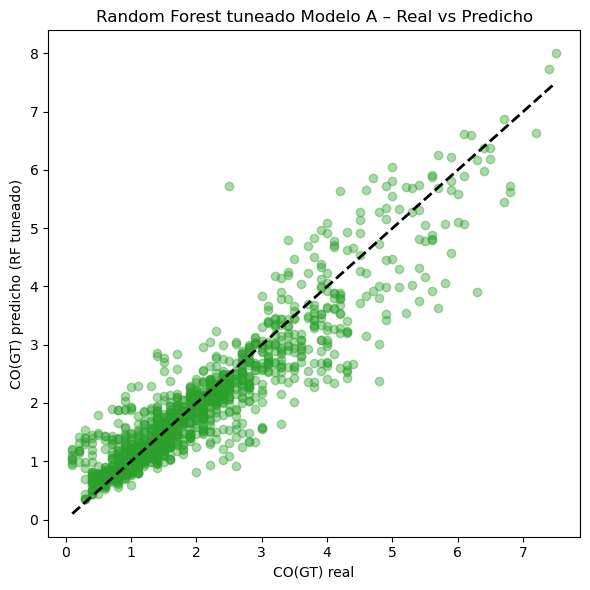

In [161]:
# Predicciones del RF tuneado
y_pred_rf_tuned = rf_tuneado.predict(X_A_test)

plt.figure(figsize=(6,6))
plt.scatter(
    y_A_test,
    y_pred_rf_tuned,
    alpha=0.4,
    color="tab:green"
)

# Línea ideal y = x
plt.plot(
    [y_A_test.min(), y_A_test.max()],
    [y_A_test.min(), y_A_test.max()],
    "--",
    color="black",
    linewidth=2
)

plt.xlabel("CO(GT) real")
plt.ylabel("CO(GT) predicho (RF tuneado)")
plt.title("Random Forest tuneado Modelo A – Real vs Predicho")
plt.tight_layout()
plt.show()


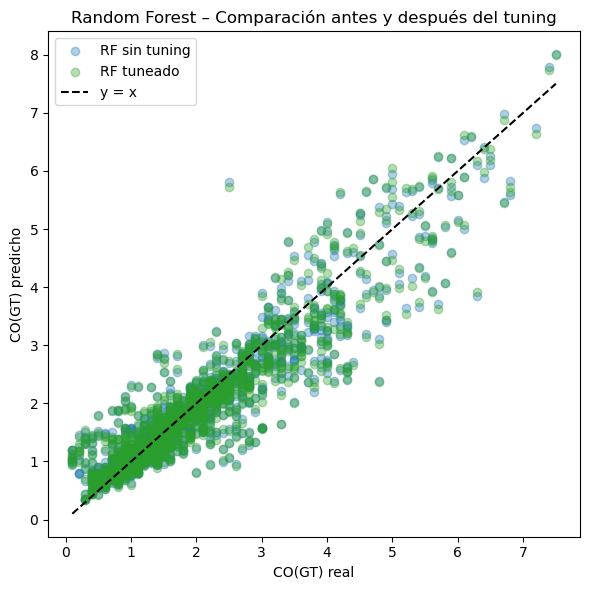

In [127]:
plt.figure(figsize=(6,6))

plt.scatter(
    y_A_test,
    y_pred_rf,
    alpha=0.35,
    color="tab:blue",
    label="RF sin tuning"
)

plt.scatter(
    y_A_test,
    y_pred_rf_tuned,
    alpha=0.35,
    color="tab:green",
    label="RF tuneado"
)

plt.plot(
    [y_A_test.min(), y_A_test.max()],
    [y_A_test.min(), y_A_test.max()],
    "--",
    color="black",
    label="y = x"
)

plt.xlabel("CO(GT) real")
plt.ylabel("CO(GT) predicho")
plt.title("Random Forest – Comparación antes y después del tuning")
plt.legend()
plt.tight_layout()
plt.show()


## Random Forest – Modelo B (sin tuning)


En el Modelo B se entrena un Random Forest utilizando el mismo conjunto de entrenamiento y test que en el Modelo A, pero excluyendo la variable PT08.S1(CO) del conjunto de variables explicativas. De esta forma, se analiza el impacto de la ausencia de este sensor en un modelo no lineal, manteniendo el resto de condiciones constantes para que la comparación sea justa.

In [128]:
rf_B_base = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

rf_B_base.fit(X_B_train, y_B_train)


RandomForestRegressor(max_depth=12, min_samples_leaf=5, n_estimators=300,
                      n_jobs=-1, random_state=42)

**Métricas Evaluación Random Forest Modelo B (sin tuning)** 

In [159]:
y_pred_rf_B = rf_B_base.predict(X_B_test)

mae_rf_B  = mean_absolute_error(y_B_test, y_pred_rf_B)
rmse_rf_B = np.sqrt(mean_squared_error(y_B_test, y_pred_rf_B))

print("Random Forest Modelo B (sin tuning)")
print("RF Modelo B sin tuning – MAE:", mae_rf_B)
print("RF Modelo B sin tuning – RMSE:", rmse_rf_B)


Random Forest Modelo B (sin tuning)
RF Modelo B sin tuning – MAE: 0.3472699587506211
RF Modelo B sin tuning – RMSE: 0.5062630703972734


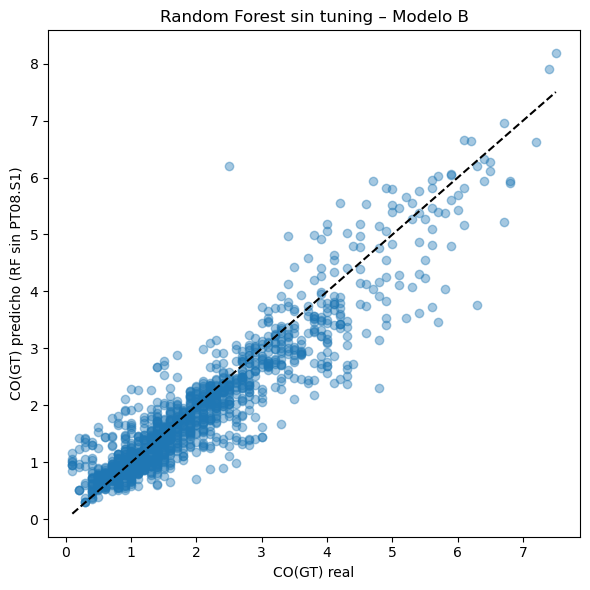

In [130]:

plt.figure(figsize=(6,6))
plt.scatter(y_B_test, y_pred_rf_B, alpha=0.4, color="tab:blue")

plt.plot(
    [y_B_test.min(), y_B_test.max()],
    [y_B_test.min(), y_B_test.max()],
    "--", color="black"
)

plt.xlabel("CO(GT) real")
plt.ylabel("CO(GT) predicho (RF sin PT08.S1)")
plt.title("Random Forest sin tuning – Modelo B")
plt.tight_layout()
plt.show()


## Random Forest – Modelo B (tuneado)

Finalmente, se entrena un Random Forest para el Modelo B utilizando los mismos hiperparámetros óptimos obtenidos en el Modelo A. Aunque el ajuste de hiperparámetros mejora el rendimiento respecto a la versión sin tuning, los resultados siguen siendo inferiores a los del Modelo A, lo que confirma la importancia del sensor PT08.S1(CO) en la predicción de CO(GT).

In [131]:
rf_B_tuned = RandomForestRegressor(
    n_estimators=300,
    max_depth=16,
    min_samples_leaf=3,
    random_state=42,
    n_jobs=-1
)

rf_B_tuned.fit(X_B_train, y_B_train)


RandomForestRegressor(max_depth=16, min_samples_leaf=3, n_estimators=300,
                      n_jobs=-1, random_state=42)

**Métricas Evaluación Random Forest Modelo B (con tuning)** 

In [160]:
y_pred_rf_B_tuned = rf_B_tuned.predict(X_B_test)

mae_rf_B_tuned  = mean_absolute_error(y_B_test, y_pred_rf_B_tuned)
rmse_rf_B_tuned = np.sqrt(mean_squared_error(y_B_test, y_pred_rf_B_tuned))

print("Random Forest Modelo B (con tuning)")
print("RF Modelo B tuneado – MAE:", mae_rf_B_tuned)
print("RF Modelo B tuneado – RMSE:", rmse_rf_B_tuned)


Random Forest Modelo B (con tuning)
RF Modelo B tuneado – MAE: 0.36204411351537413
RF Modelo B tuneado – RMSE: 0.521170515245761


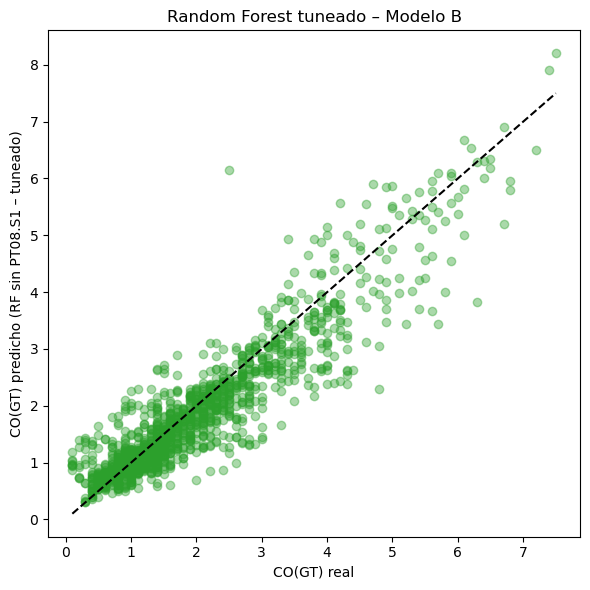

In [133]:
plt.figure(figsize=(6,6))
plt.scatter(y_B_test, y_pred_rf_B_tuned, alpha=0.4, color="tab:green")

plt.plot(
    [y_B_test.min(), y_B_test.max()],
    [y_B_test.min(), y_B_test.max()],
    "--", color="black"
)

plt.xlabel("CO(GT) real")
plt.ylabel("CO(GT) predicho (RF sin PT08.S1 – tuneado)")
plt.title("Random Forest tuneado – Modelo B")
plt.tight_layout()
plt.show()


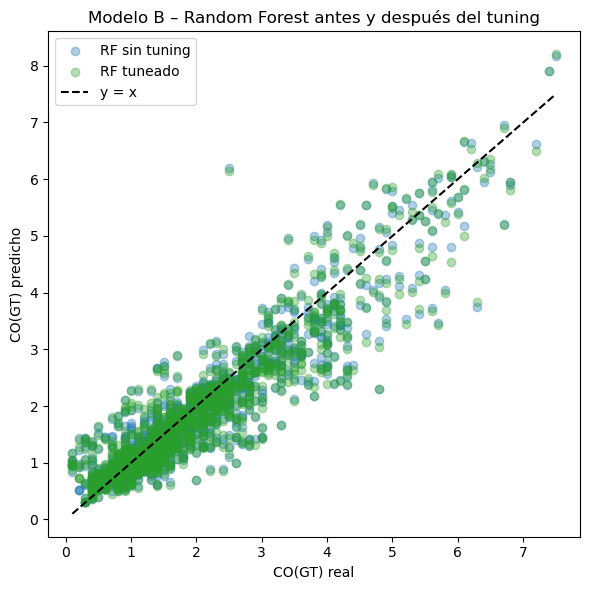

In [134]:
plt.figure(figsize=(6,6))

plt.scatter(
    y_B_test, y_pred_rf_B,
    alpha=0.35, color="tab:blue", label="RF sin tuning"
)

plt.scatter(
    y_B_test, y_pred_rf_B_tuned,
    alpha=0.35, color="tab:green", label="RF tuneado"
)

plt.plot(
    [y_B_test.min(), y_B_test.max()],
    [y_B_test.min(), y_B_test.max()],
    "--", color="black", label="y = x"
)

plt.xlabel("CO(GT) real")
plt.ylabel("CO(GT) predicho")
plt.title("Modelo B – Random Forest antes y después del tuning")
plt.legend()
plt.tight_layout()
plt.show()


## Gráficos Comparativos

In [ ]:
def recta_prediccion(y_real, y_pred):
    lr = LinearRegression()
    lr.fit(y_real.values.reshape(-1, 1), y_pred)
    return lr.coef_[0], lr.intercept_


In [170]:
def recta_prediccion(y_real, y_pred):
    lr = LinearRegression()
    lr.fit(y_real.values.reshape(-1, 1), y_pred)
    return lr.coef_[0], lr.intercept_

In [172]:
m_lin_A, b_lin_A = recta_prediccion(y_A_test, y_A_pred)
m_lin_B, b_lin_B = recta_prediccion(y_B_test, y_B_pred)


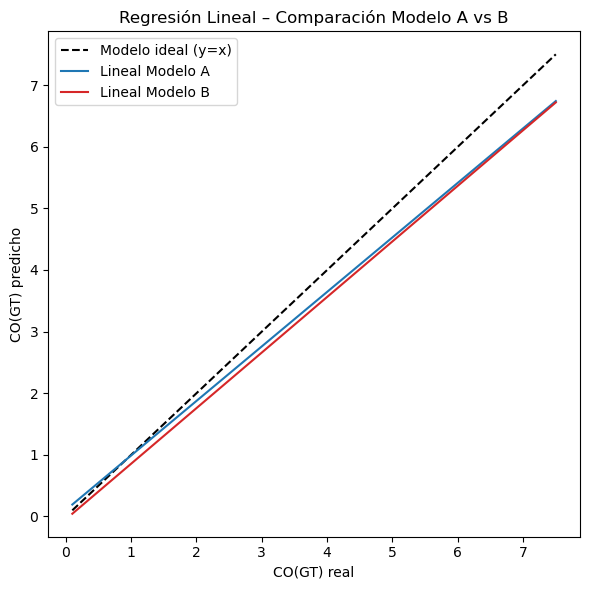

In [173]:
x = np.linspace(y_A_test.min(), y_A_test.max(), 100)

plt.figure(figsize=(6,6))

plt.plot(x, x, "--", color="black", label="Modelo ideal (y=x)")
plt.plot(x, m_lin_A*x + b_lin_A, color="tab:blue", label="Lineal Modelo A")
plt.plot(x, m_lin_B*x + b_lin_B, color="tab:red", label="Lineal Modelo B")

plt.xlabel("CO(GT) real")
plt.ylabel("CO(GT) predicho")
plt.title("Regresión Lineal – Comparación Modelo A vs B")
plt.legend()
plt.tight_layout()
plt.show()


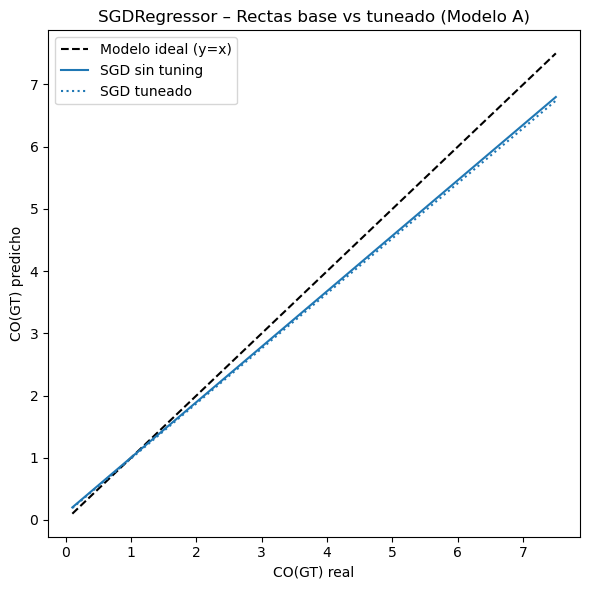

In [165]:
# Pendientes
m_sgd, b_sgd = recta_prediccion(y_A_test, y_pred_sgd)
m_sgd_t, b_sgd_t = recta_prediccion(y_A_test, y_pred_sgd_final)

x = np.linspace(y_A_test.min(), y_A_test.max(), 100)

plt.figure(figsize=(6,6))

plt.plot(x, x, "--", color="black", label="Modelo ideal (y=x)")
plt.plot(x, m_sgd*x + b_sgd, color="tab:blue", label="SGD sin tuning")
plt.plot(x, m_sgd_t*x + b_sgd_t, color="tab:blue", linestyle=":", label="SGD tuneado")

plt.xlabel("CO(GT) real")
plt.ylabel("CO(GT) predicho")
plt.title("SGDRegressor – Rectas base vs tuneado (Modelo A)")
plt.legend()
plt.tight_layout()
plt.show()


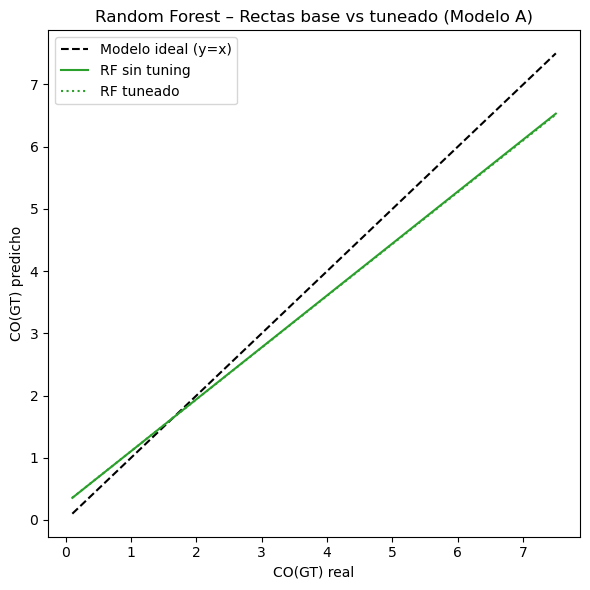

In [166]:
m_rf, b_rf = recta_prediccion(y_A_test, y_pred_rf)
m_rf_t, b_rf_t = recta_prediccion(y_A_test, y_pred_rf_tuned)

plt.figure(figsize=(6,6))

plt.plot(x, x, "--", color="black", label="Modelo ideal (y=x)")
plt.plot(x, m_rf*x + b_rf, color="tab:green", label="RF sin tuning")
plt.plot(x, m_rf_t*x + b_rf_t, color="tab:green", linestyle=":", label="RF tuneado")

plt.xlabel("CO(GT) real")
plt.ylabel("CO(GT) predicho")
plt.title("Random Forest – Rectas base vs tuneado (Modelo A)")
plt.legend()
plt.tight_layout()
plt.show()


In [174]:
m_sgd, b_sgd = recta_prediccion(y_A_test, y_pred_sgd_final)
m_rf, b_rf   = recta_prediccion(y_A_test, y_pred_rf_tuned)


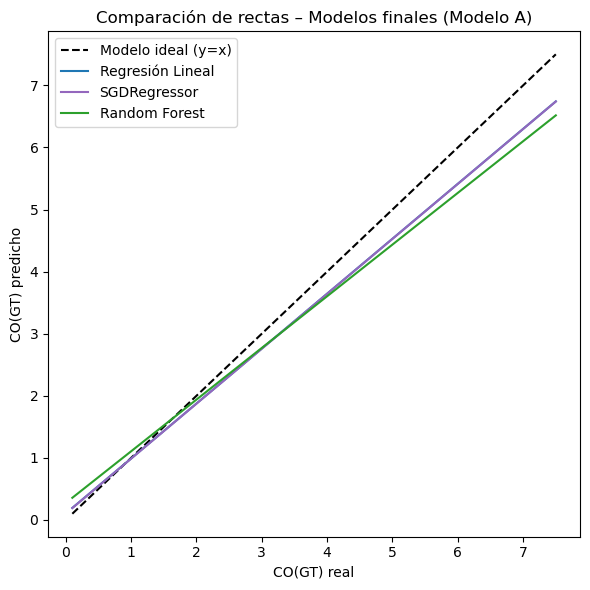

In [175]:
plt.figure(figsize=(6,6))

plt.plot(x, x, "--", color="black", label="Modelo ideal (y=x)")
plt.plot(x, m_lin_A*x + b_lin_A, color="tab:blue", label="Regresión Lineal")
plt.plot(x, m_sgd*x + b_sgd, color="tab:purple", label="SGDRegressor")
plt.plot(x, m_rf*x + b_rf, color="tab:green", label="Random Forest")

plt.xlabel("CO(GT) real")
plt.ylabel("CO(GT) predicho")
plt.title("Comparación de rectas – Modelos finales (Modelo A)")
plt.legend()
plt.tight_layout()
plt.show()


## Conclusiones

En este proyecto se ha abordado el problema de predecir la concentración de monóxido de carbono en entornos urbanos a partir de señales de sensores de bajo coste, variables meteorológicas y componentes temporales, formulando en términos de un problema de aprendizaje supervisado de regresión.
A lo largo del trabajo se ha seguido un proceso completo de análisis de datos y modelización, comenzando con un análisis exploratorio que permitió comprender el comportamiento de las variables y justificar la definición de CO(GT) como variable objetivo. Posteriormente, se llevó a cabo un proceso de ingeniería y selección de variables orientado a evitar fugas de información y a construir un conjunto de predictores coherente con un escenario real de predicción.
Los resultados obtenidos muestran que es posible predecir la concentración de CO con un nivel de precisión razonable utilizando modelos relativamente simples e interpretables, sin necesidad de recurrir a algoritmos altamente complejos. Este aspecto resulta especialmente relevante desde el punto de vista práctico, ya que facilita la comprensión del modelo y su posible aplicación en sistemas de monitorización de la calidad del aire basados en sensores low-cost.
Como limitaciones del estudio, cabe destacar la dependencia del rendimiento respecto a determinados sensores clave y la posible presencia de ruido inherente a los datos de sensores químicos. Como líneas futuras de trabajo, se podría explorar la incorporación de modelos específicos de series temporales, técnicas de regularización más avanzadas o la validación del enfoque en otros entornos urbanos.
En conclusión, el proyecto demuestra que un enfoque bien planteado de aprendizaje automático puede contribuir de forma efectiva a la predicción de la calidad del aire, aportando una herramienta útil para apoyar la toma de decisiones en contextos urbanos y ambientales.